In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from typing import Tuple
import sys
import pandas as pd
import ast
from Enum.Flavour import Flavour
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
matplotlib.use("Agg")

sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers  = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam(isVaryLineStyle=False)
from InferenceUtil import *
%matplotlib inline

In [46]:
"""
{TrainID:{epoch:csv_name}}
"""

prediction_base_csv_name = {
    "base" : "/lustre/hpc/icecube/cyan/factory/IceCubeTransformer/predictions/",
    1: {
        "inter" : "20250522/model_20250518_152548/182601/",
        11 : "predictions_epoch_11_val_loss_0.131.csv",
        12 : "predictions_epoch_12_val_loss_0.132.csv",
    },
    2: {
        "inter" : "/20250522/model_20250518_153151/182604/",
        8 : "predictions_epoch_8_val_loss_0.133.csv",
        14 : "predictions_epoch_14_val_loss_0.134.csv",
    },
    3: {
        "inter" : "/20250522/model_20250518_233656/182805/",
        6: "predictions_epoch_6_val_loss_0.127.csv",
        9 : "predictions_epoch_9_val_loss_0.126.csv",
        17 : "predictions_epoch_17_val_loss_0.125.csv",
    },
    4: {
        "inter" : "/20250522/model_20250518_233931/182911/",
        9 : "predictions_epoch_9_val_loss_0.125.csv",
        13 : "predictions_epoch_13_val_loss_0.125.csv",
        17 : "predictions_epoch_17_val_loss_0.124.csv",
    },
    5: {
        "inter" : "/20250522/model_20250518_172719/183610/",
        14 : "predictions_epoch_14_val_loss_0.124.csv",
        15 : "predictions_epoch_15_val_loss_0.125.csv",
        17 : "predictions_epoch_17_val_loss_0.124.csv",
    },
    6: {
        "inter" : "/20250522/model_20250518_172825/183940/",
        16 : "predictions_epoch_16_val_loss_0.123.csv",
        20 : "predictions_epoch_20_val_loss_0.122.csv",
    },
    7: {
        "inter" : "/20250522/model_20250518_174841/184419/",
        10 : "predictions_epoch_10_val_loss_0.124.csv",
        14 : "predictions_epoch_14_val_loss_0.124.csv",
    },
    8: {
        "inter" : "/20250522/model_20250518_174943/185226/",
        12 : "predictions_epoch_12_val_loss_0.124.csv",
        19 : "predictions_epoch_19_val_loss_0.123.csv",
        20 : "predictions_epoch_20.csv",
    },
    9: {
        "inter" : "/20250522/model_20250518_235356/185734/",
        12 : "predictions_epoch_12_val_loss_0.124.csv",
        20 : "predictions_epoch_20.csv",
    },
    10: {
        "inter" : "/20250522/model_20250518_235535/190550/",
        10 : "predictions_epoch_10_val_loss_0.120.csv",
        17 : "predictions_epoch_17.csv",
        20 : "predictions_epoch_20.csv",
    },
    11: {
        "inter" : "/20250522/model_20250519_111436/191058/",
        10 : "predictions_epoch_10_val_loss_0.122.csv",
        17 : "predictions_epoch_17.csv",
        35 : "predictions_epoch_35.csv",
    },
    12: {
        "inter" : "/20250522/model_20250519_111753/191921/",
        13 : "predictions_epoch_13_val_loss_0.119.csv",
        23 : "predictions_epoch_23.csv",
    },
    13: {
        "inter" : "/20250522/model_20250519_112057/192424/",
        11 : "predictions_epoch_11_val_loss_0.115.csv",
        35 : "predictions_epoch_35.csv",
    },
    14: {
        "inter" : "",
        8 : "",
        14 : "",
    },
    15: {
        "inter" : "20250523/model_20250519_173628/103313/",
        17 : "predictions_epoch_17.csv",
        20 : "predictions_epoch_20.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
    16: {
        "inter" : "20250522/model_20250519_180656/194201/",
        17 : "predictions_epoch_17.csv",
        20 : "predictions_epoch_20.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
    
    19: {
        "inter" : "20250522/model_20250521_122145/200753/",
        17 : "predictions_epoch_17_val_loss_0.109.csv",
        19 : "predictions_epoch_19_val_loss_0.110.csv",
        20 : "predictions_epoch_20.csv",
        21 : "predictions_epoch_21_val_loss_0.110.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
    23: {
        "inter" : "20250525/model_20250521_122145/122329/",
        17 : "predictions_epoch_17_val_loss_0.109.csv",
        19 : "predictions_epoch_19_val_loss_0.110.csv",
        20 : "predictions_epoch_20.csv",
        21 : "predictions_epoch_21_val_loss_0.110.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
    24: {
        "inter" : "20250526/model_20250521_122145/013519/",
        17 : "predictions_epoch_17_val_loss_0.109.csv",
        19 : "predictions_epoch_19_val_loss_0.110.csv",
        20 : "predictions_epoch_20.csv",
        21 : "predictions_epoch_21_val_loss_0.110.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
    25: {
        "inter" : "20250527/model_20250521_122145/150458/",
        17 : "predictions_epoch_17_val_loss_0.109.csv",
        19 : "predictions_epoch_19_val_loss_0.110.csv",
        20 : "predictions_epoch_20.csv",
        21 : "predictions_epoch_21_val_loss_0.110.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
    30: {
        "note": "32 features",
        "inter" : "20250528/model_20250525_234823/201541/",
        17 : "predictions_epoch_17_val_loss_0.109.csv",
        19 : "predictions_epoch_19_val_loss_0.110.csv",
        20 : "predictions_epoch_20.csv",
        21 : "predictions_epoch_21_val_loss_0.110.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
    40: {
        "note" : "track vs cascade",
        "inter" : "",
        17 : "predictions_epoch_17_val_loss_0.109.csv",
        19 : "predictions_epoch_19_val_loss_0.110.csv",
        20 : "predictions_epoch_20.csv",
        21 : "predictions_epoch_21_val_loss_0.110.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
    50: {
        "note" : "",
        "inter" : "",
        17 : "predictions_epoch_17_val_loss_0.109.csv",
        19 : "predictions_epoch_19_val_loss_0.110.csv",
        20 : "predictions_epoch_20.csv",
        21 : "predictions_epoch_21_val_loss_0.110.csv",
        23 : "predictions_epoch_23.csv",
        26 : "predictions_epoch_26.csv",
        29 : "predictions_epoch_29.csv",
        32 : "predictions_epoch_32.csv",
        35 : "predictions_epoch_35.csv",
        49: "predictions_epoch_last.csv"
    },
}

In [47]:
def build_csv_name(train_id: int, epoch: int) -> str:
    if train_id not in prediction_base_csv_name:
        raise ValueError(f"Train ID {train_id} not found in prediction_base_csv_name.")
    if epoch not in prediction_base_csv_name[train_id]:
        raise ValueError(f"Epoch {epoch} not found for Train ID {train_id}.")
    inter = prediction_base_csv_name[train_id]["inter"]
    csv_name = prediction_base_csv_name[train_id][epoch]
    full_path = f"{prediction_base_csv_name['base']}{inter}{csv_name}"
    return full_path

In [48]:
build_csv_name(24, 19)

'/lustre/hpc/icecube/cyan/factory/IceCubeTransformer/predictions/20250526/model_20250521_122145/013519/predictions_epoch_19_val_loss_0.110.csv'

In [49]:
def plot_ROC(train_id: int, epoch: int):
    id = f"TrainID {train_id} Epoch {epoch}"
    df = pd.read_csv(build_csv_name(train_id, epoch))
    plot_multi_flavour_ROC(df, id)

In [50]:
def plot_prob(train_id: int, epoch: int):
    id = f"TrainID {train_id} Epoch {epoch}"
    df = pd.read_csv(build_csv_name(train_id, epoch))
    plot_prob_distribution_with_truncation(df, Flavour.TAU, id, [0.9,1.0])
    plot_prob_distribution_with_truncation(df, Flavour.TAU, id)
    # plot_prob_distribution_with_truncation(df, Flavour.MU, id, [0.8,1.0])
    # plot_prob_distribution_with_truncation(df, Flavour.MU, id)
    # plot_prob_distribution_with_truncation(df, Flavour.E, id, [0.8,1.0])
    # plot_prob_distribution_with_truncation(df, Flavour.E, id)

In [51]:
def plot_energy(train_id: int, epoch: int):
    id = f"TrainID {train_id} Epoch {epoch}"
    df = pd.read_csv(build_csv_name(train_id, epoch))
    plot_energy_distribution(df, Flavour.TAU, Flavour.TAU, id)
    plot_energy_distribution(df, Flavour.MU, Flavour.MU, id)
    plot_energy_distribution(df, Flavour.E, Flavour.E, id)

In [52]:
def plot_zenith(train_id: int, epoch: int):
    id = f"TrainID {train_id} Epoch {epoch}"
    df = pd.read_csv(build_csv_name(train_id, epoch))
    plot_zenith_distribution(df, Flavour.TAU, Flavour.TAU, id)
    plot_zenith_distribution(df, Flavour.MU, Flavour.MU, id)
    plot_zenith_distribution(df, Flavour.E, Flavour.E, id)

In [53]:
def get_em_all(train_id: int, epoch: int):
    plot_prob(train_id, epoch)
    plot_ROC(train_id, epoch)
    # plot_energy(train_id, epoch)
    # plot_zenith(train_id, epoch)


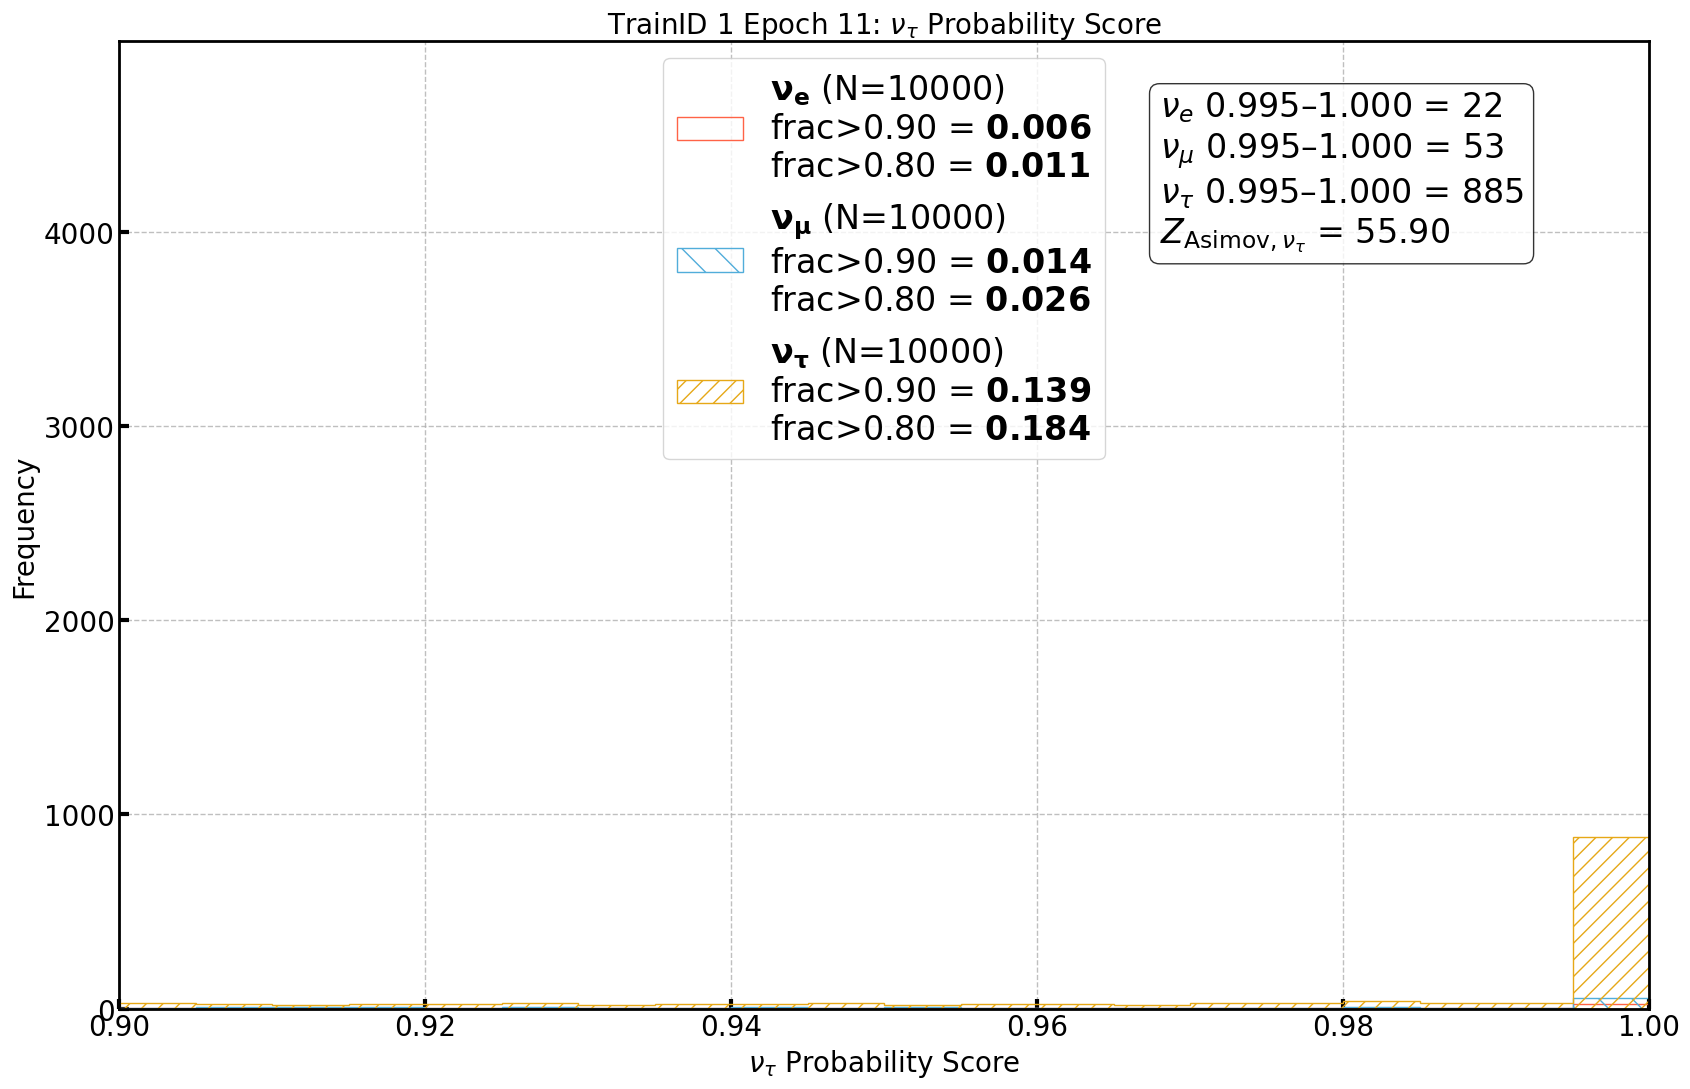

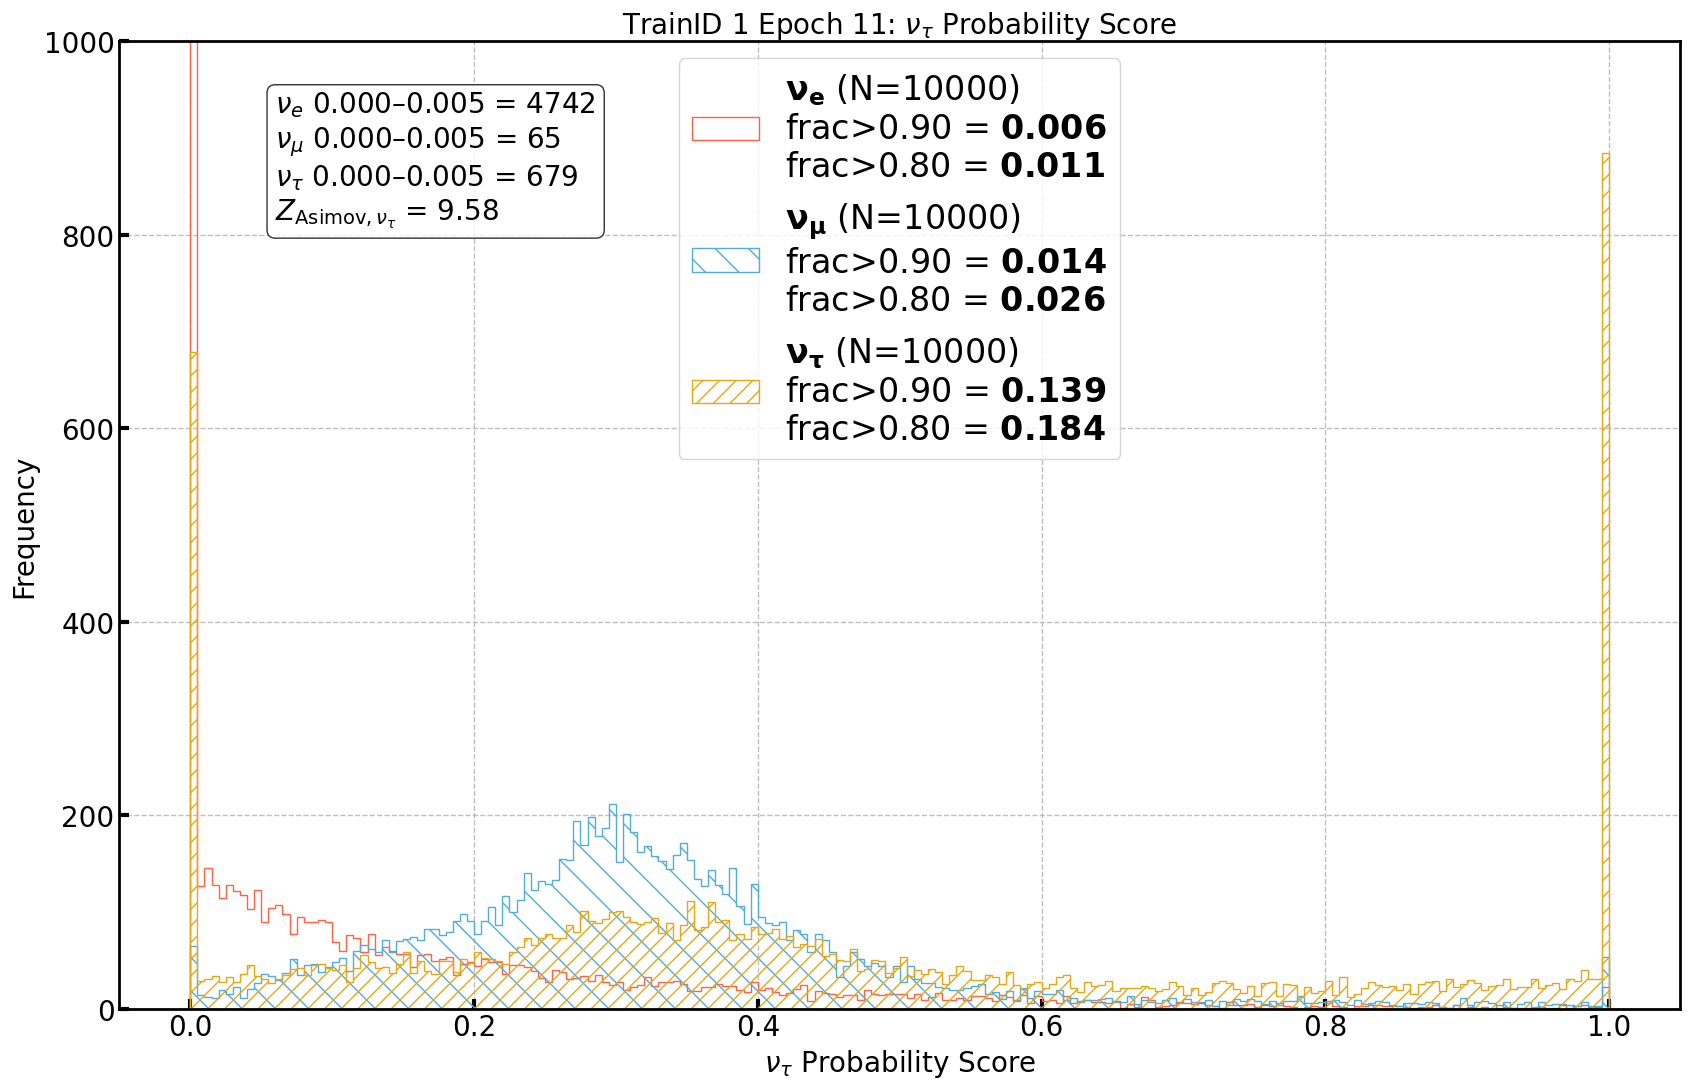

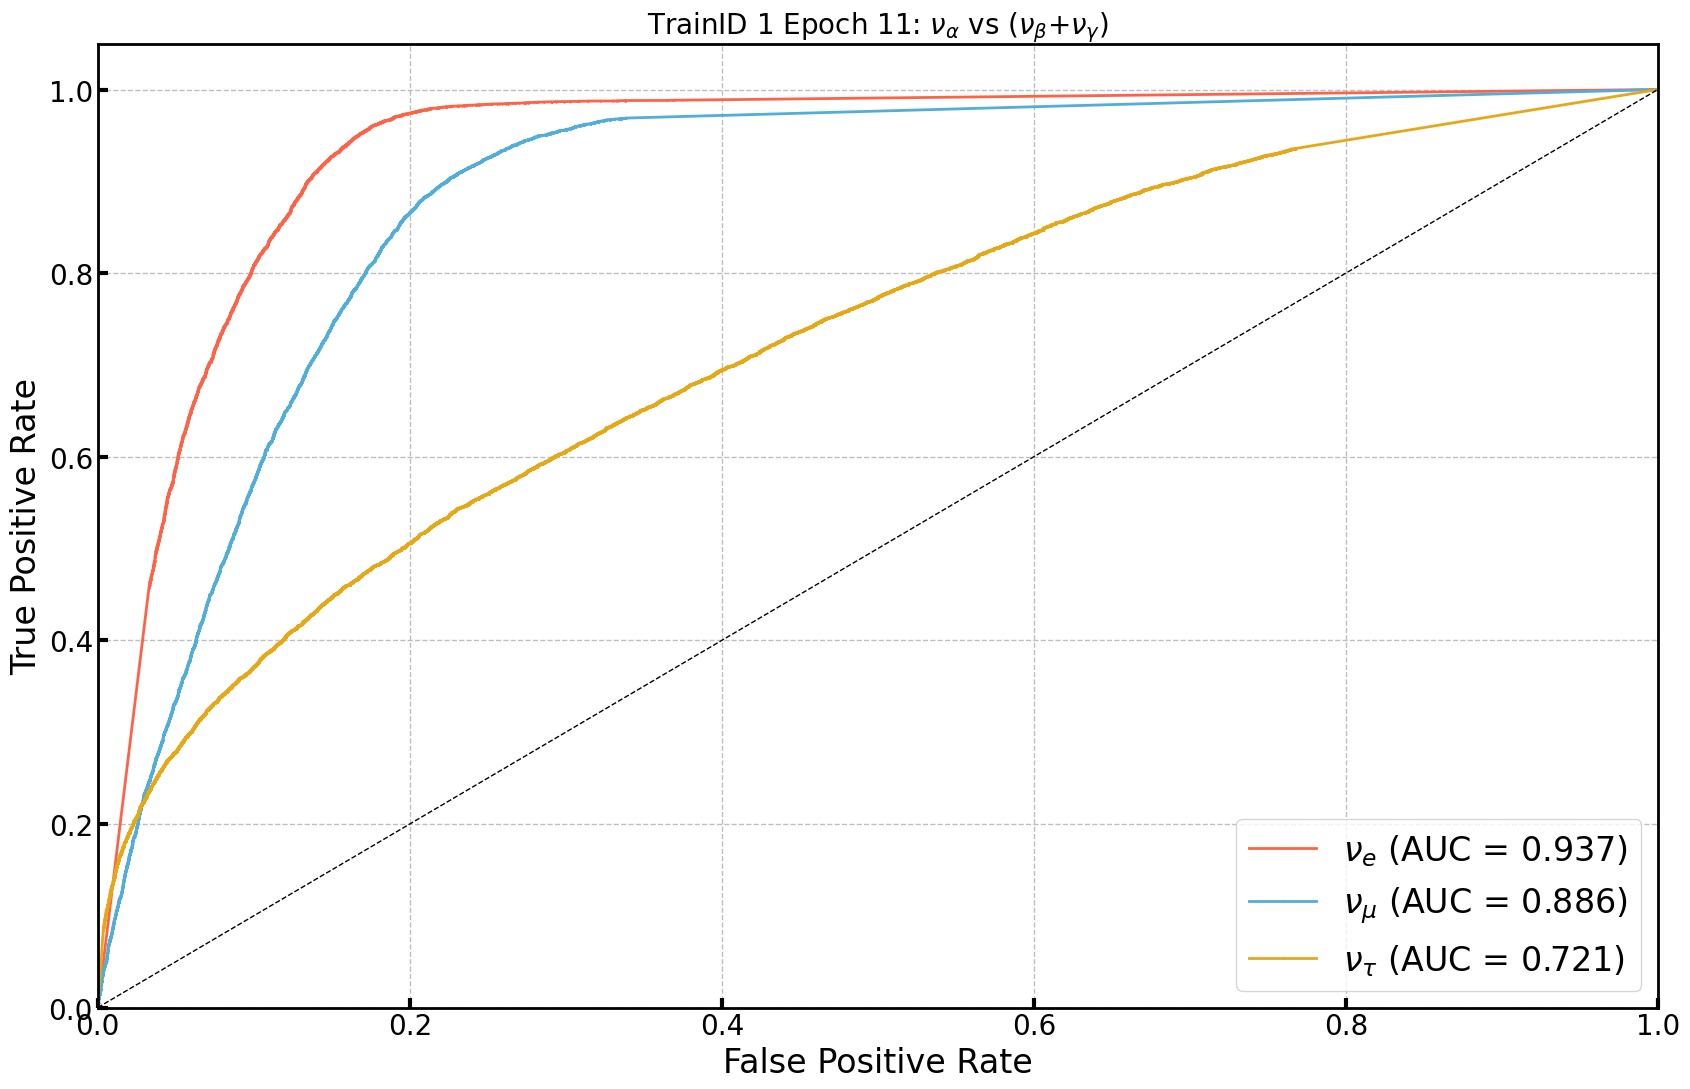

In [54]:
get_em_all(1, 11)

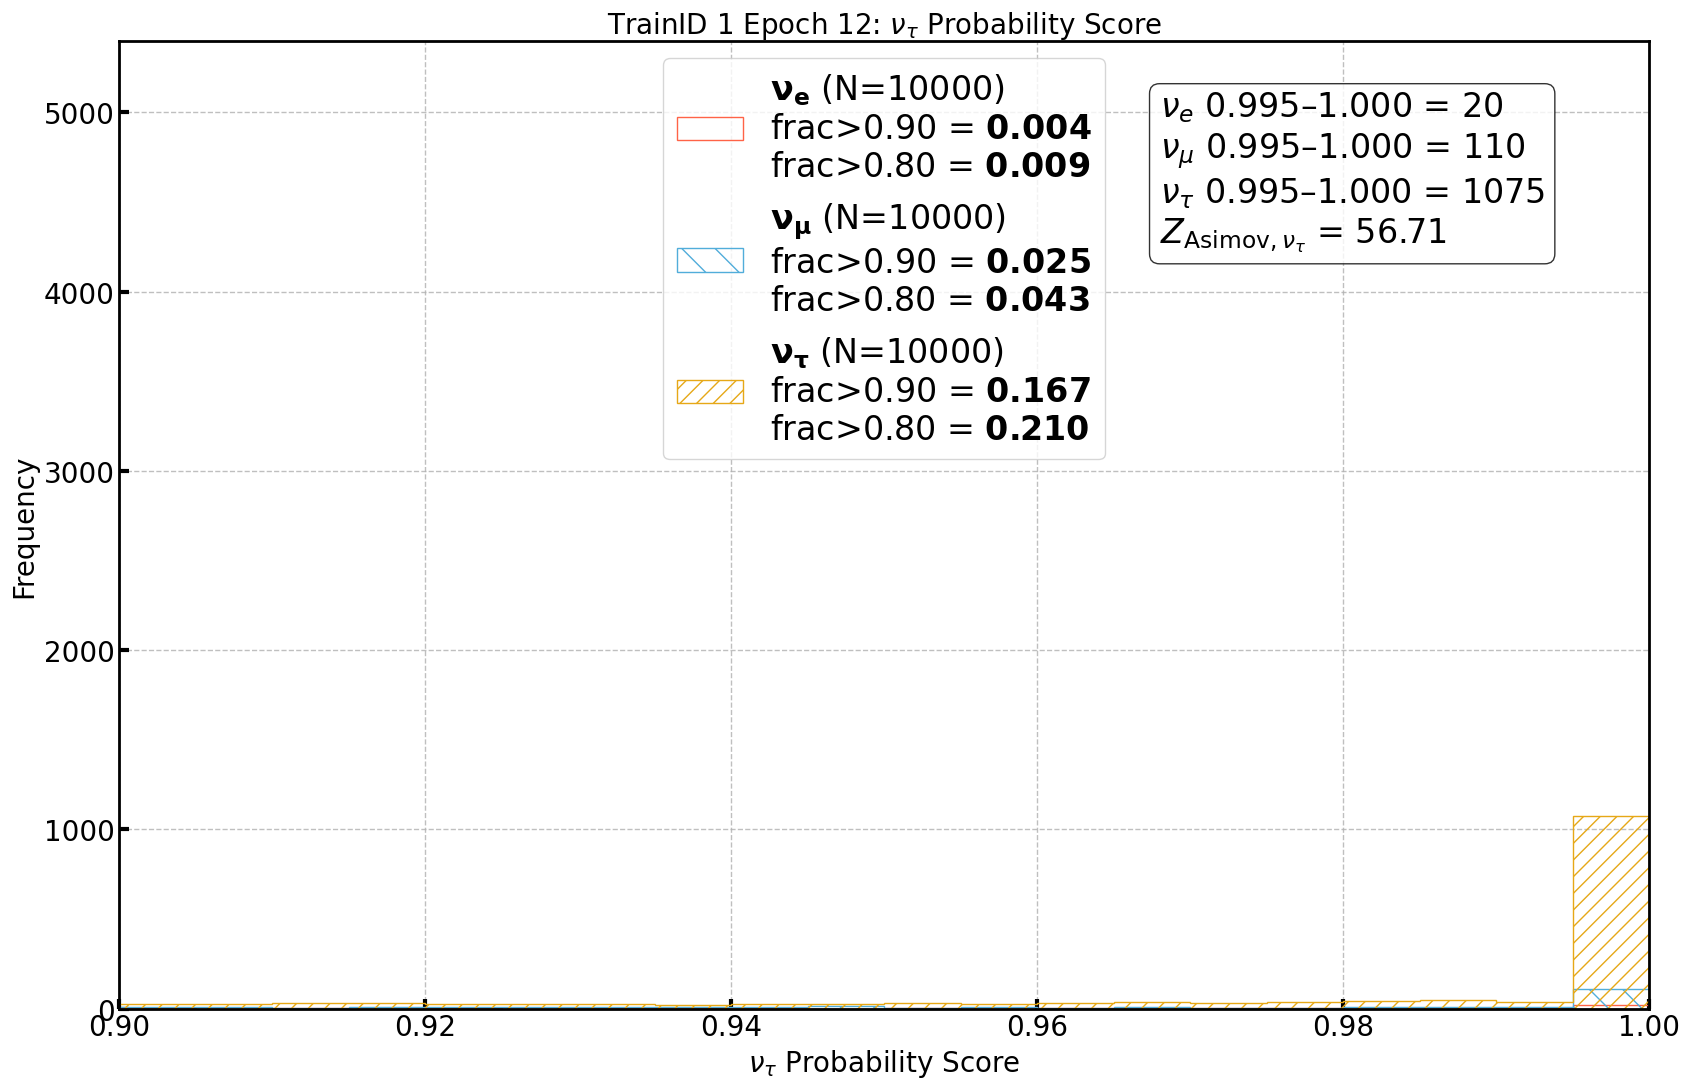

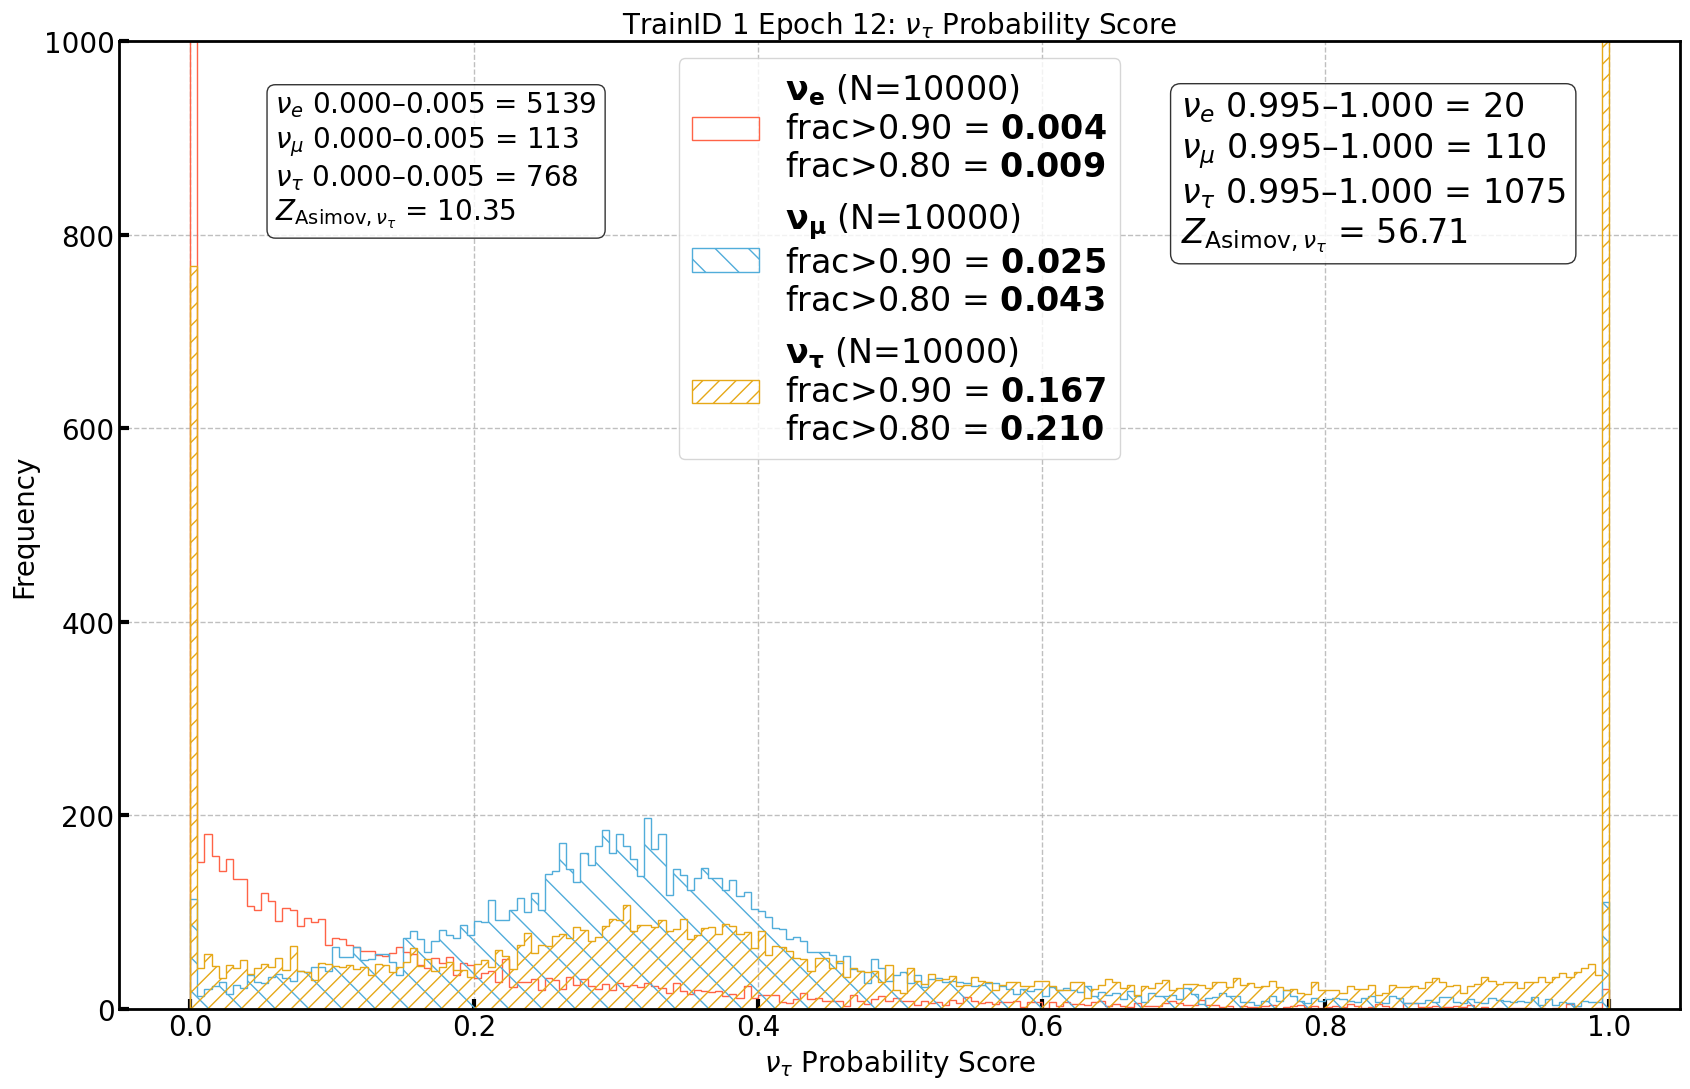

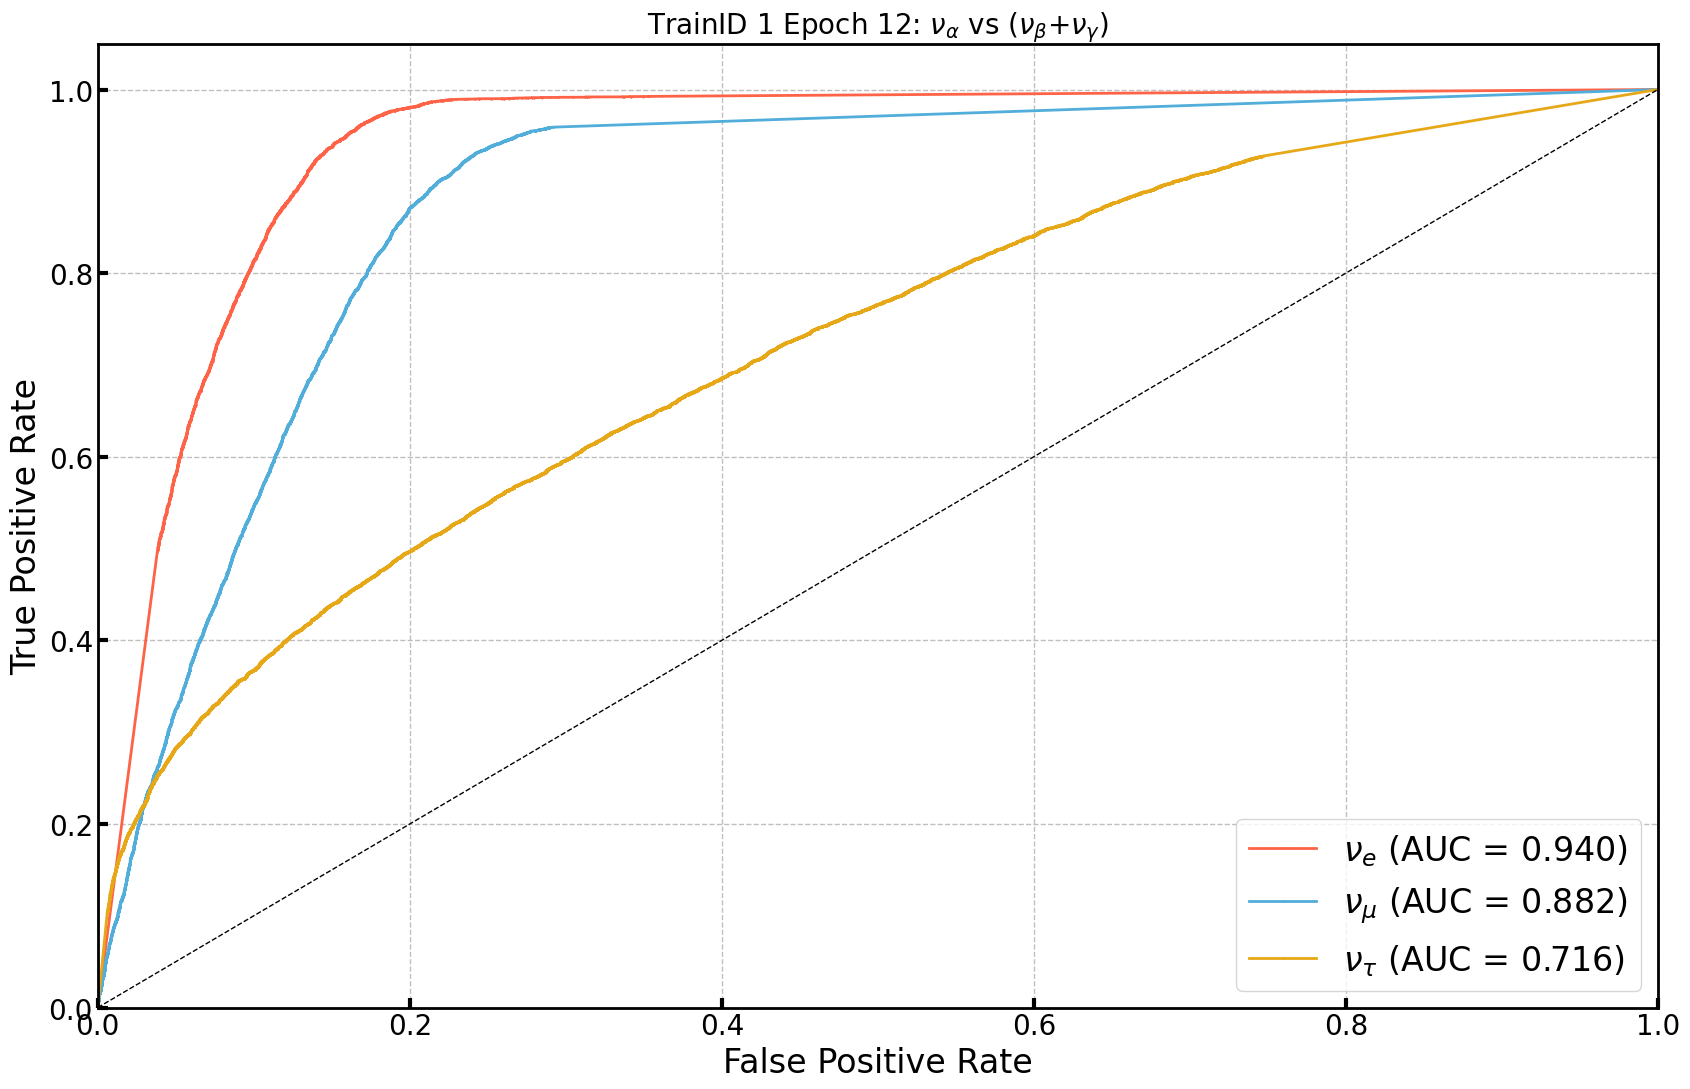

In [55]:
get_em_all(1,12)

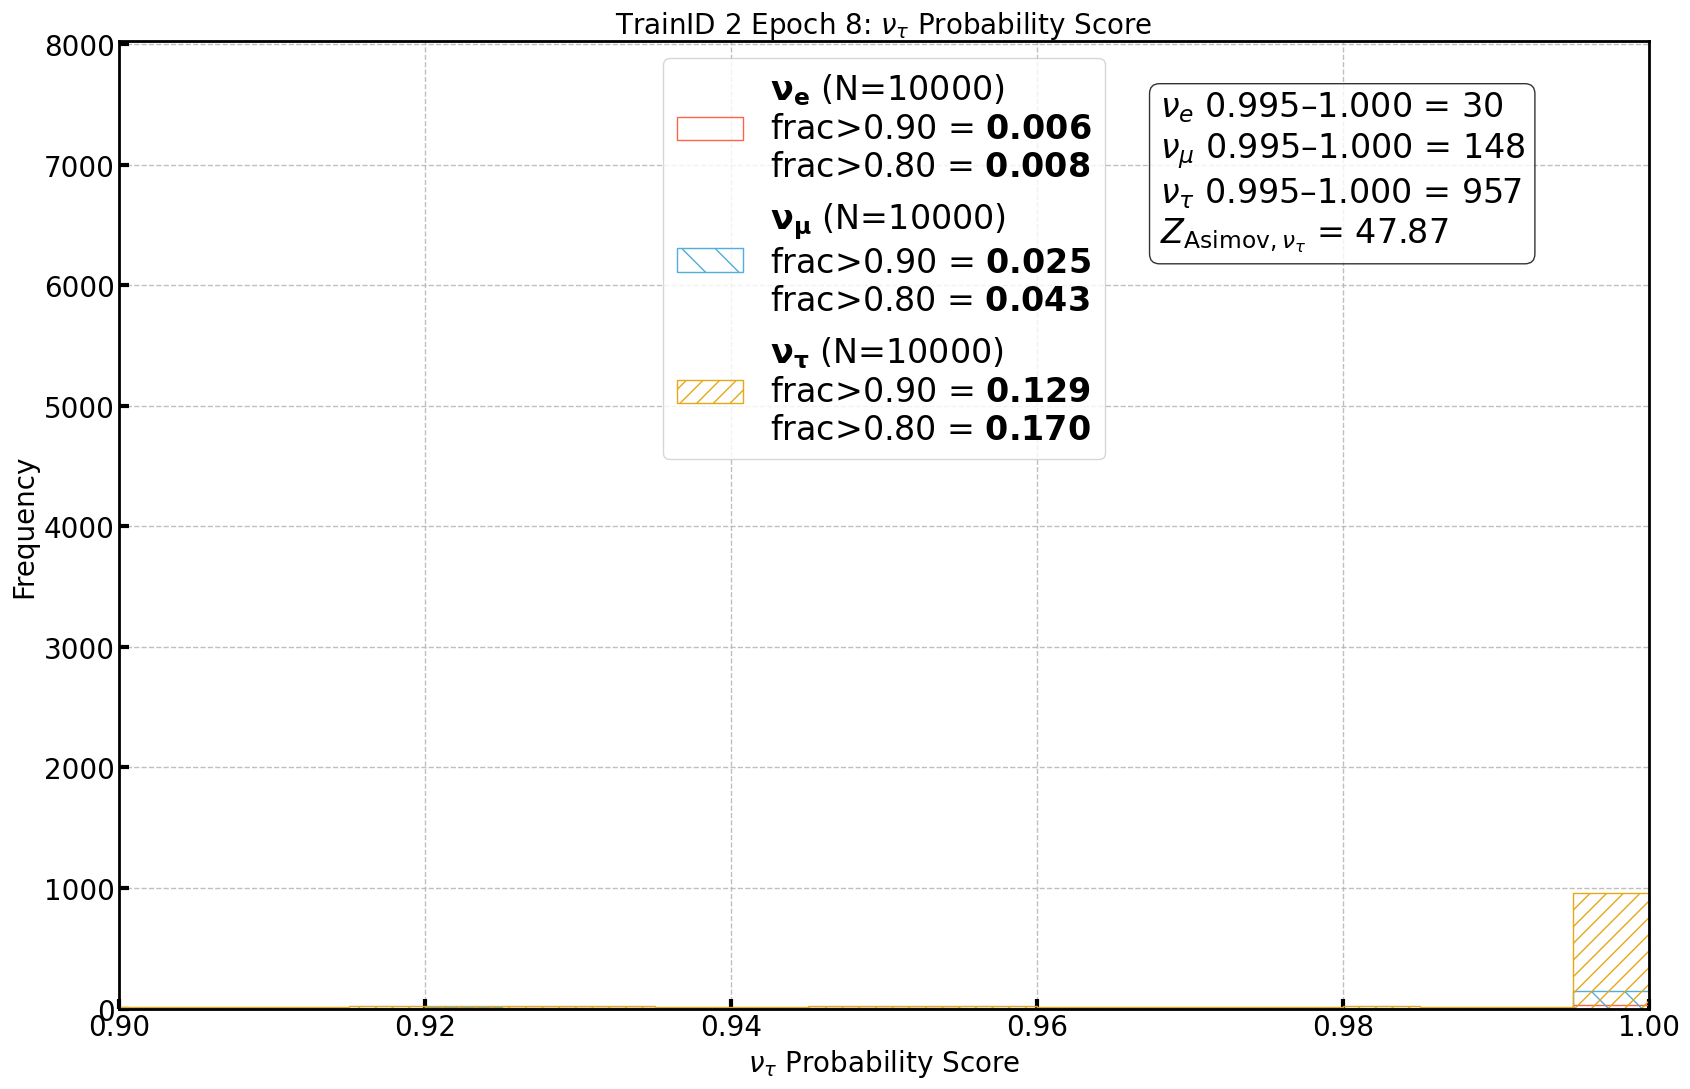

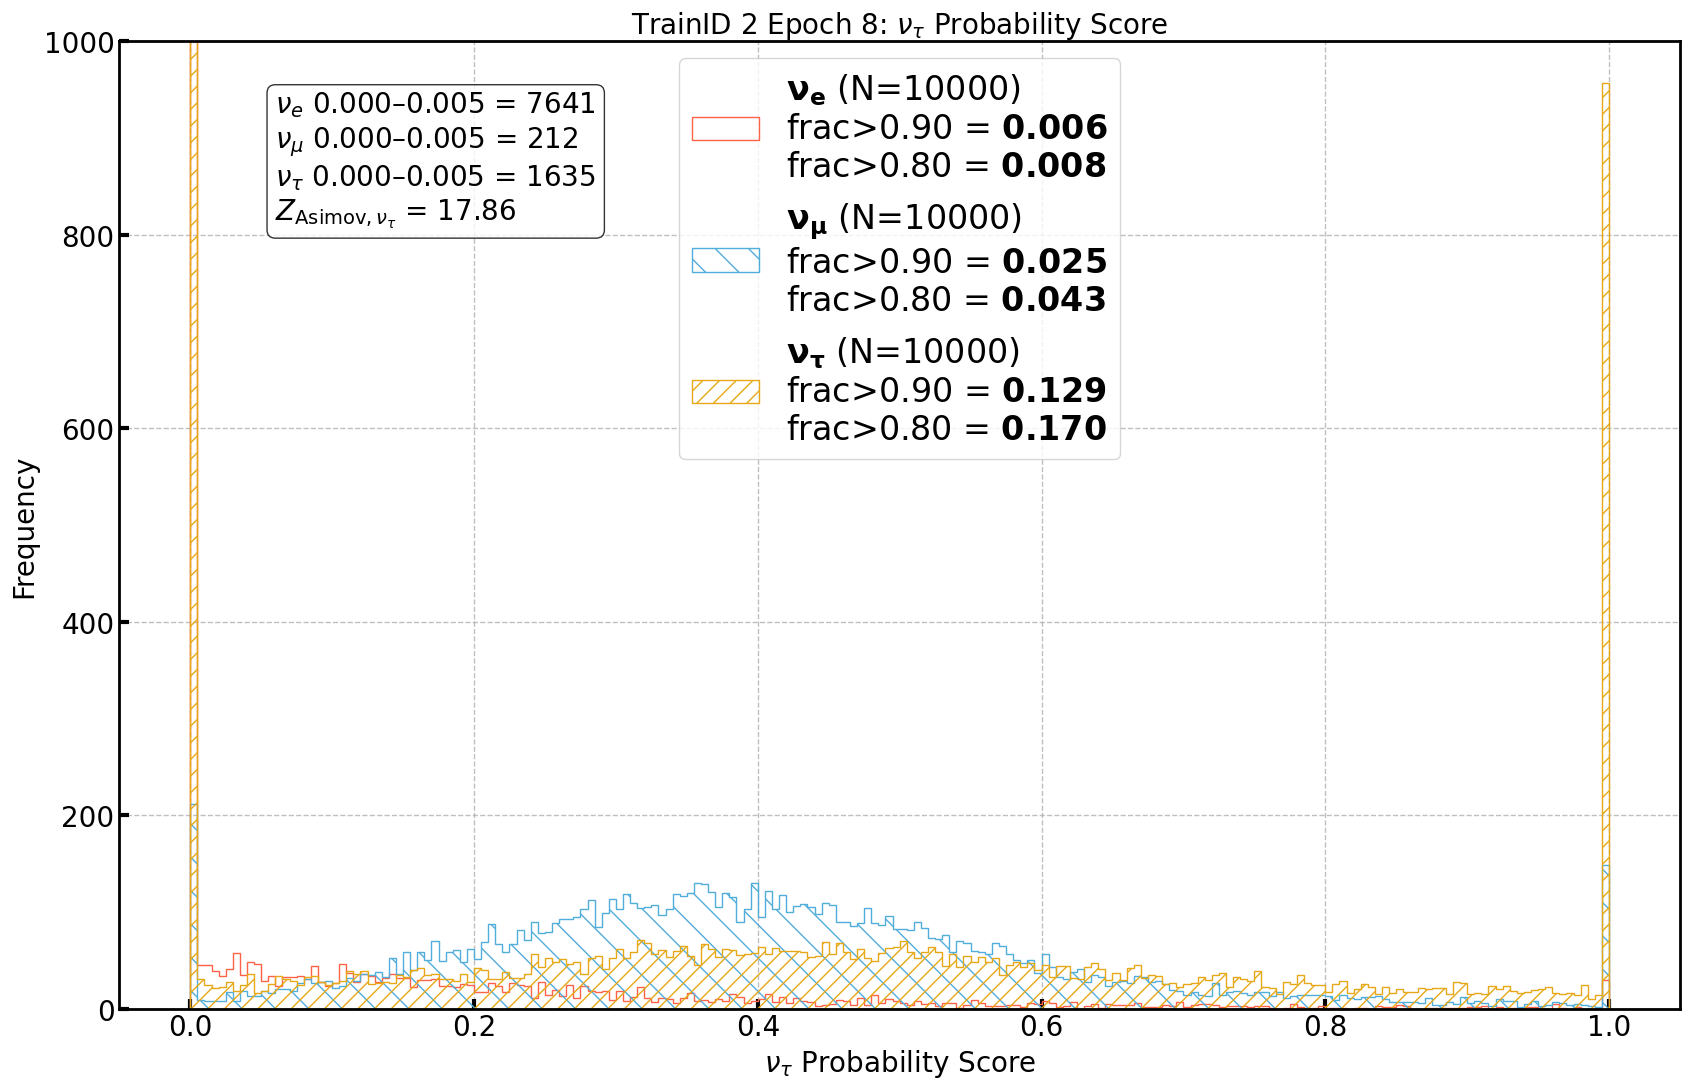

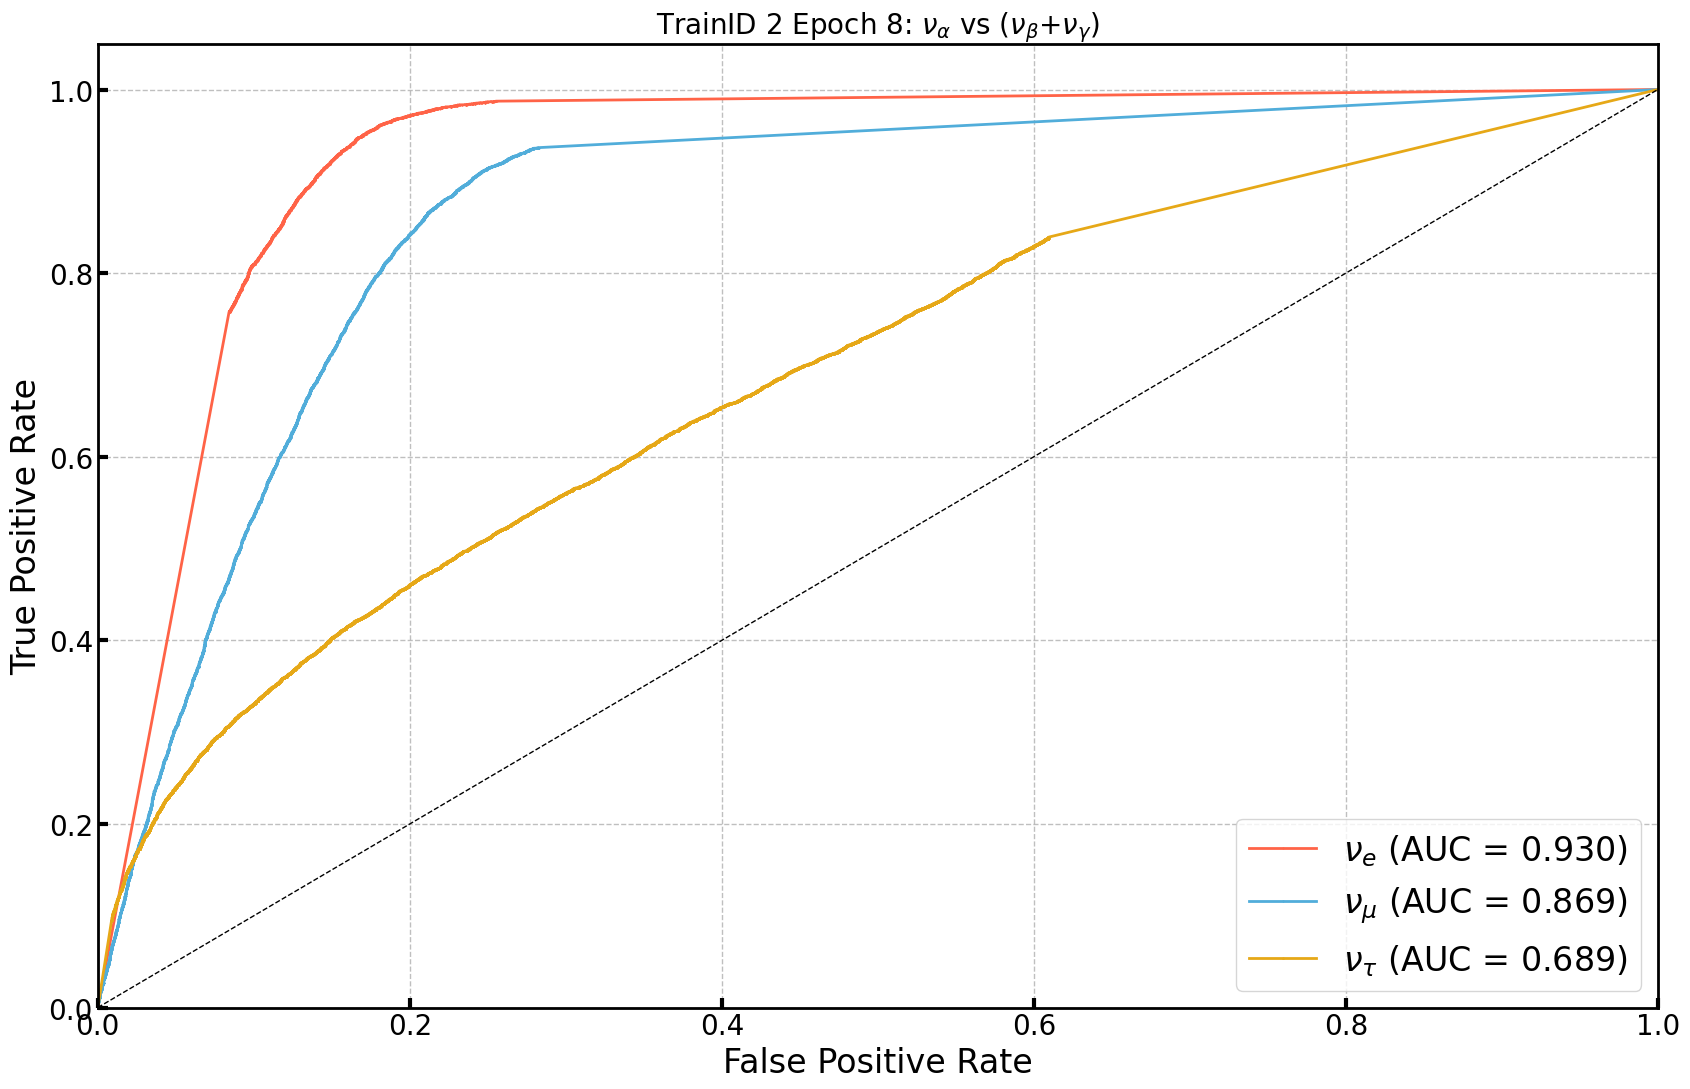

In [56]:
get_em_all(2,8)